# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=katsuura
Processing Record 2 of Set 1 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fortuna
Processing Record 3 of Set 1 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kavieng
Processing Record 4 of Set 1 | ginir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ginir
Processing Record 5 of Set 1 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jalu
Processing Record 6 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cape%20town
Processing Record 7 of Set 1 | yar-sale
ht

Processing Record 3 of Set 2 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=qaqortoq
Processing Record 4 of Set 2 | notse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=notse
Processing Record 5 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yellowknife
Processing Record 6 of Set 2 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vila%20velha
Processing Record 7 of Set 2 | keti bandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=keti%20bandar
Processing Record 8 of Set 2 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=marcona
City not found. Skipping...
Processing Record 9 of Set 2 | urtaaul
http://ap

Processing Record 5 of Set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=arraial%20do%20cabo
Processing Record 6 of Set 3 | tolbazy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tolbazy
Processing Record 7 of Set 3 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=acajutla
Processing Record 8 of Set 3 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=svetlogorsk
Processing Record 9 of Set 3 | sindand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sindand
City not found. Skipping...
Processing Record 10 of Set 3 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bredasdorp
Processing Record 11 of Set 3 | ust

Processing Record 7 of Set 4 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=viligili
City not found. Skipping...
Processing Record 8 of Set 4 | bossembele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bossembele
City not found. Skipping...
Processing Record 9 of Set 4 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=the%20valley
Processing Record 10 of Set 4 | falmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=falmouth
Processing Record 11 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=iqaluit
Processing Record 12 of Set 4 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=georgetown
Processing Record

Processing Record 10 of Set 5 | baturaja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=baturaja
Processing Record 11 of Set 5 | santa fe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=santa%20fe
Processing Record 12 of Set 5 | cabatuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cabatuan
Processing Record 13 of Set 5 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kudahuvadhoo
Processing Record 14 of Set 5 | zhemchuzhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zhemchuzhnyy
City not found. Skipping...
Processing Record 15 of Set 5 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=quatre%20cocos
Processing Record 16 of Se

Processing Record 14 of Set 6 | ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ayagoz
Processing Record 15 of Set 6 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=daru
Processing Record 16 of Set 6 | maralal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=maralal
Processing Record 17 of Set 6 | tondano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tondano
Processing Record 18 of Set 6 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ulladulla
Processing Record 19 of Set 6 | carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=carballo
Processing Record 20 of Set 6 | naron
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 17 of Set 7 | progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=progreso
Processing Record 18 of Set 7 | road town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=road%20town
Processing Record 19 of Set 7 | dumas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dumas
Processing Record 20 of Set 7 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pisco
Processing Record 21 of Set 7 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=severo-yeniseyskiy
Processing Record 22 of Set 7 | vila do maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vila%20do%20maio
Processing Record 23 of Set 7 | redlands
http://api.openwe

Processing Record 19 of Set 8 | khartoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khartoum
Processing Record 20 of Set 8 | gourcy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=gourcy
Processing Record 21 of Set 8 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aswan
Processing Record 22 of Set 8 | pingzhuang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pingzhuang
City not found. Skipping...
Processing Record 23 of Set 8 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=esperance
Processing Record 24 of Set 8 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cheuskiny
City not found. Skipping...
Processing Record 25 of Set 

Processing Record 22 of Set 9 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zyryanka
Processing Record 23 of Set 9 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ancud
Processing Record 24 of Set 9 | yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yatou
Processing Record 25 of Set 9 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=torbay
Processing Record 26 of Set 9 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ponta%20do%20sol
Processing Record 27 of Set 9 | svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=svetlyy
City not found. Skipping...
Processing Record 28 of Set 9 | kaduna
http://api.openweathe

Processing Record 25 of Set 10 | awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=awjilah
Processing Record 26 of Set 10 | placido de castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=placido%20de%20castro
Processing Record 27 of Set 10 | andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=andenes
City not found. Skipping...
Processing Record 28 of Set 10 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=russell
Processing Record 29 of Set 10 | tukrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tukrah
City not found. Skipping...
Processing Record 30 of Set 10 | turtkul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=turtkul
City not f

Processing Record 27 of Set 11 | puerto cortes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=puerto%20cortes
City not found. Skipping...
Processing Record 28 of Set 11 | severodvinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=severodvinsk
Processing Record 29 of Set 11 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sorong
Processing Record 30 of Set 11 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ahipara
Processing Record 31 of Set 11 | petrolina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=petrolina
Processing Record 32 of Set 11 | wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=wewak
Processing Record 33 of Set 11 | yerof

Processing Record 31 of Set 12 | bur gabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bur%20gabo
City not found. Skipping...
Processing Record 32 of Set 12 | vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vitoria
Processing Record 33 of Set 12 | benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=benguela
Processing Record 34 of Set 12 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ust-nera
Processing Record 35 of Set 12 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fairbanks
Processing Record 36 of Set 12 | poanas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=poanas
Processing Record 37 of Set 12 | saint-honore
http

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [36]:
# Display the City Data Frame
city_data_pd.head()
print (city_data_pd.groupby(city_data_pd['Cloudiness']).max())

                         City Country        Date  Humidity    Lat     Lng  \
Cloudiness                                                                   
0                  zhezkazgan      ZA  1525825825       100  71.03  173.16   
1                    waycross      US  1525824900        77  64.86  -73.48   
5                      torbay      MX  1525824000        77  47.66  -16.76   
8                       wajir      RU  1525825822       100  68.71  172.79   
12                      wewak      TG  1525825825       100  72.79  150.80   
20                yellowknife      ZA  1525825826       100  69.70  170.27   
24                   ust-nera      ZA  1525825824       100  69.38  178.42   
32                      zemio      RU  1525825783        97  62.23  155.63   
36                    rikitea      VU  1525825822       100  61.92  167.18   
40                      yatou      WS  1525824000       100  78.22  148.25   
44                   yar-sale      VN  1525825818       100  66.

## Latitude vs Temperature Plot

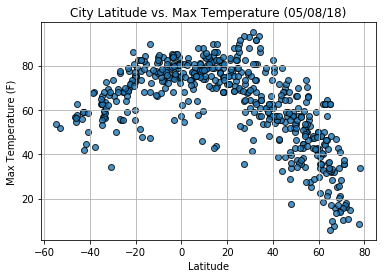

In [9]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

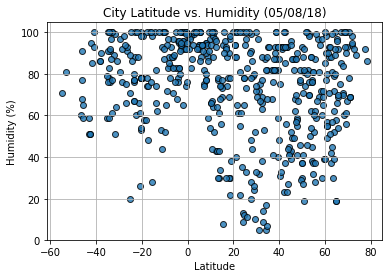

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

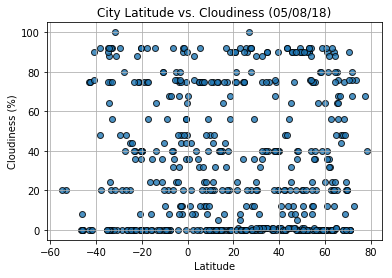

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

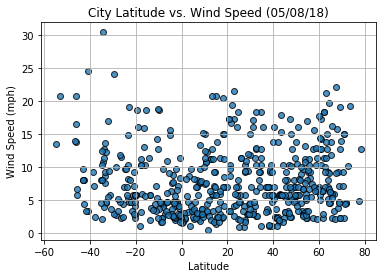

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()